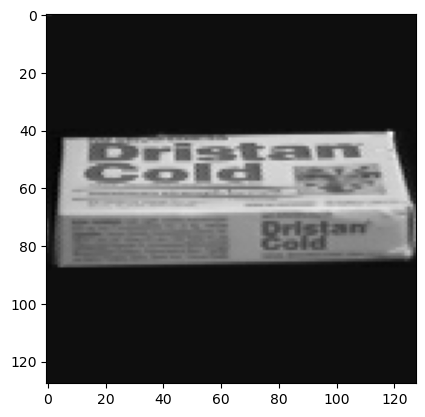

(128, 128)


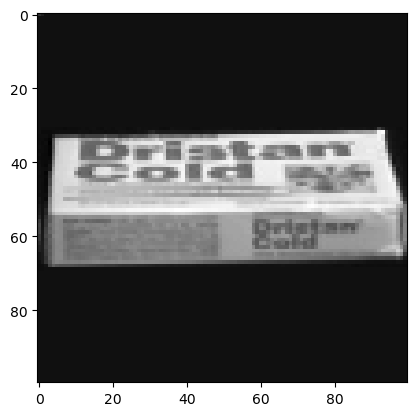

<class 'numpy.ndarray'>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten


DATADIR = "Dataset"
CATEGORIES = [ "Box", "Car", "Cat", "Circle", "Cup", "Dish", "Food", "Food can",
               "Hanger", "Jelly", "Medicine", "Metal can","Plastic", "Ship", 
               "Stapler", "Telephone","Toy", "Vase", "Vegetable","Wood" ]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()      


import random

random.shuffle(training_data)

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE,1)
y = np.array(y)
print(type(y))



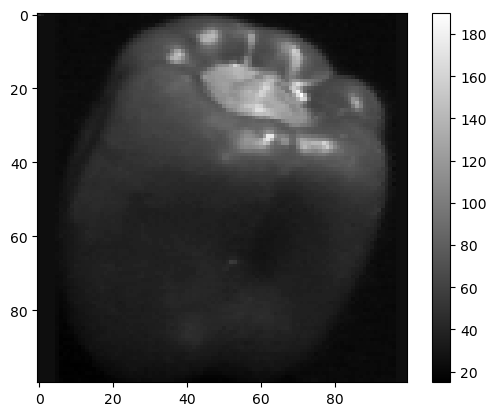

In [2]:
plt.figure()
plt.imshow(x[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

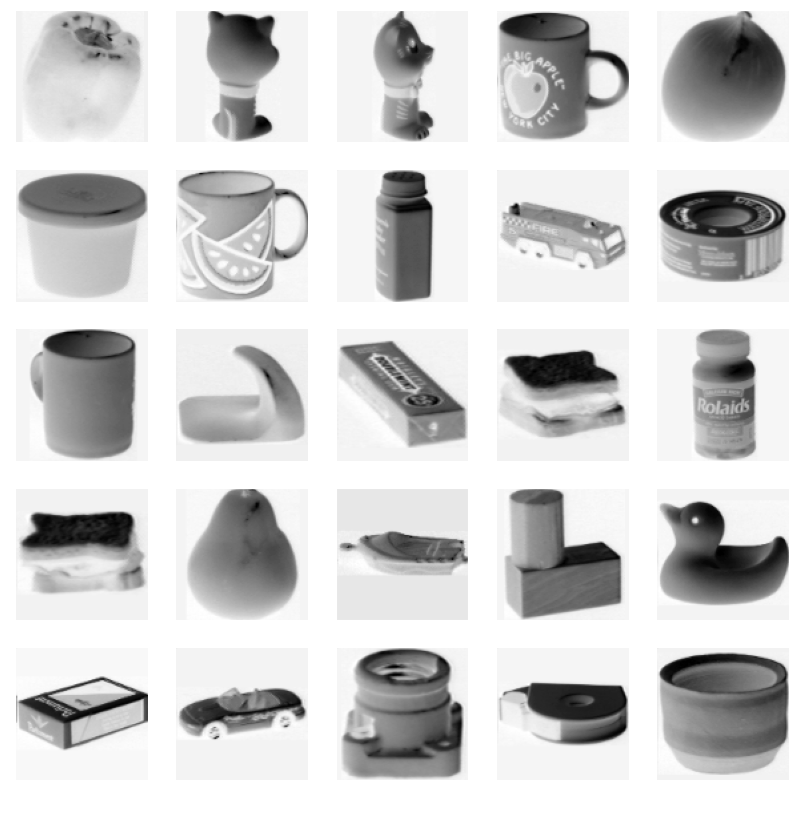

In [3]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap=plt.cm.binary)
    plt.xlabel(CATEGORIES[y[i]])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4271, 100, 100, 1)
(4271,)
(1068, 100, 100, 1)
(1068,)


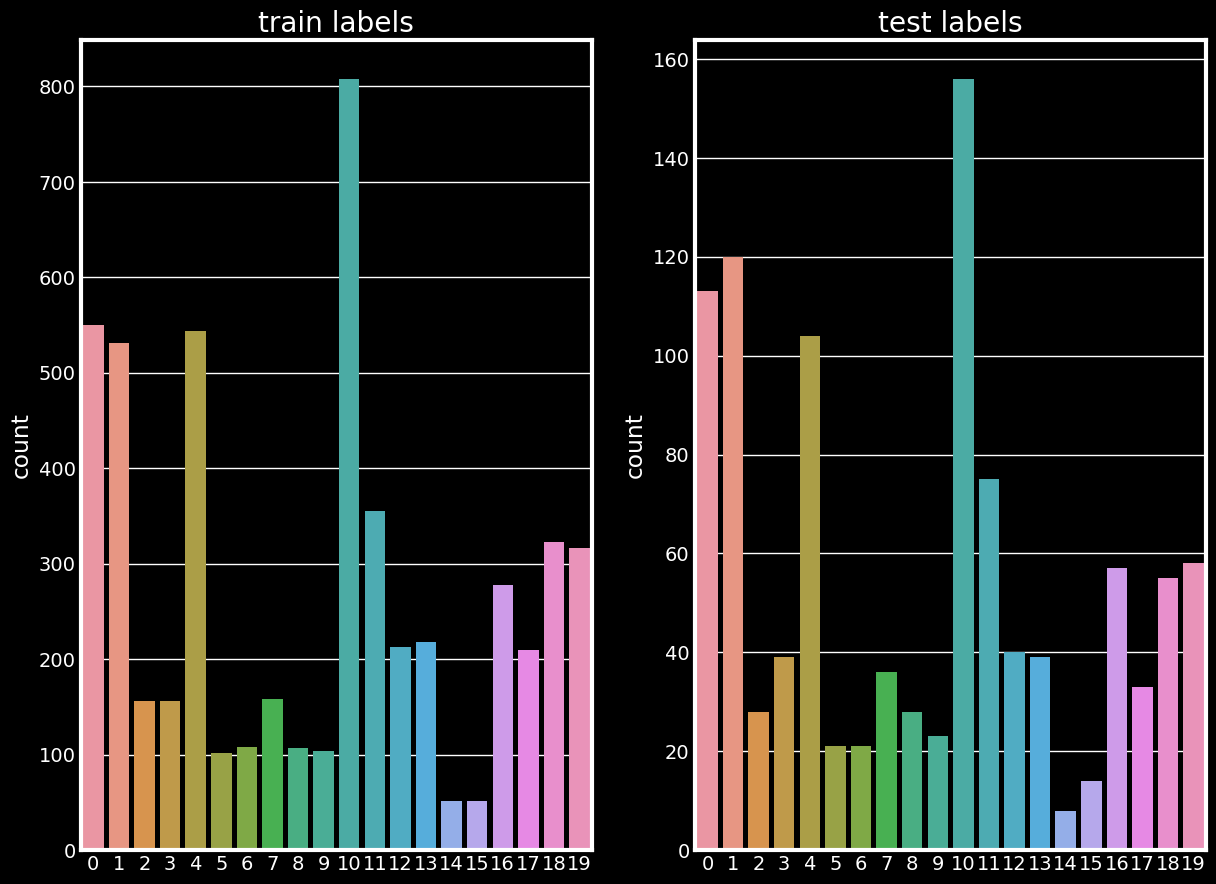

In [80]:
import seaborn as sns
plt.figure(1 , figsize = (20 ,10))
n = 0 
for z , j in zip([y , y_test] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
model = Sequential()
model.add(Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
model.add(Dense(512, activation='relu'))
model.add(Dense(265, activation='relu')) 
model.add(Dense(20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 512)               5120512   
                                                                 
 dense_1 (Dense)             (None, 265)               135945    
                                                                 
 dense_2 (Dense)             (None, 20)                5320      
                                                                 
Total params: 5,261,777
Trainable params: 5,261,777
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10,validation_data = (x_test,y_test))

Epoch 1/10
134/134 [==============================] - 15s 109ms/step - loss: 0.0575 - accuracy: 0.9813 - val_loss: 0.1192 - val_accuracy: 0.9728
Epoch 2/10
134/134 [==============================] - 16s 117ms/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.6355 - val_accuracy: 0.8624
Epoch 3/10
134/134 [==============================] - 15s 113ms/step - loss: 0.0877 - accuracy: 0.9771 - val_loss: 0.0923 - val_accuracy: 0.9766
Epoch 4/10
134/134 [==============================] - 15s 115ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0545 - val_accuracy: 0.9916
Epoch 5/10
134/134 [==============================] - 16s 116ms/step - loss: 3.7104e-04 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9925
Epoch 6/10
134/134 [==============================] - 16s 120ms/step - loss: 2.2383e-04 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9925
Epoch 7/10
134/134 [==============================] - 16s 122ms/step - loss: 1.7526e-04 - accuracy: 1.0000 - val_loss: 0.0

In [58]:
results = model.evaluate(x_test)
preds   = model.predict(x_test)

34/34 [==============================] - 0s 8ms/step


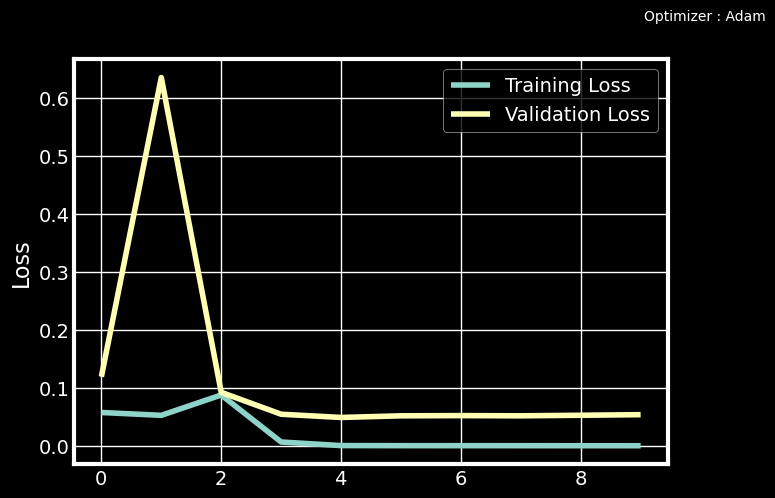

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

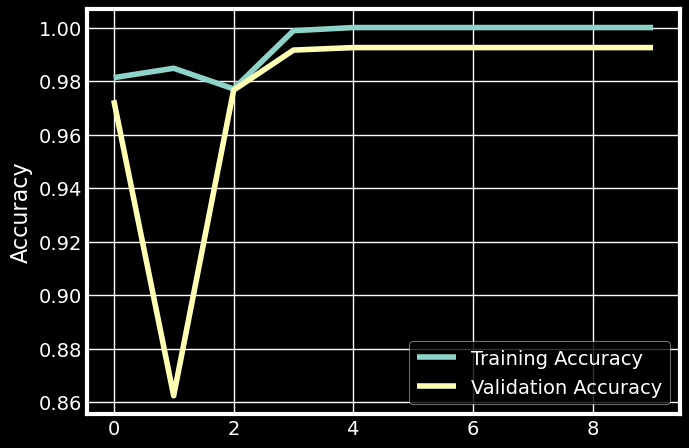

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [61]:
results = model.evaluate(x_test, y_test)
preds   = model.predict(x_test)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

34/34 [==============================] - 0s 9ms/step
The current model achieved a categorical accuracy of 99.25%!


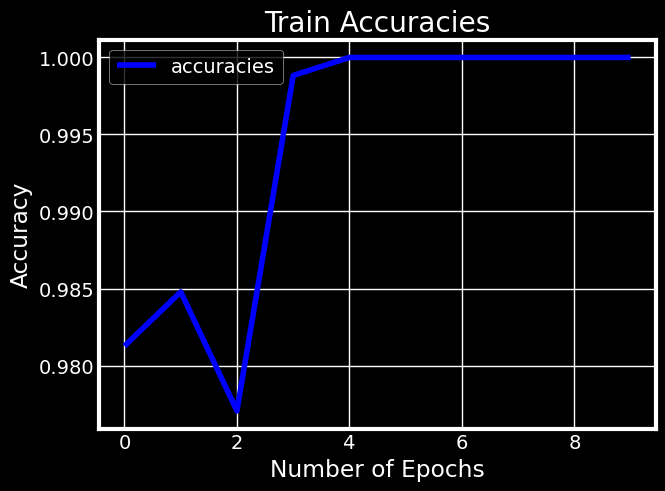

In [66]:
plt.style.use('dark_background')
plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

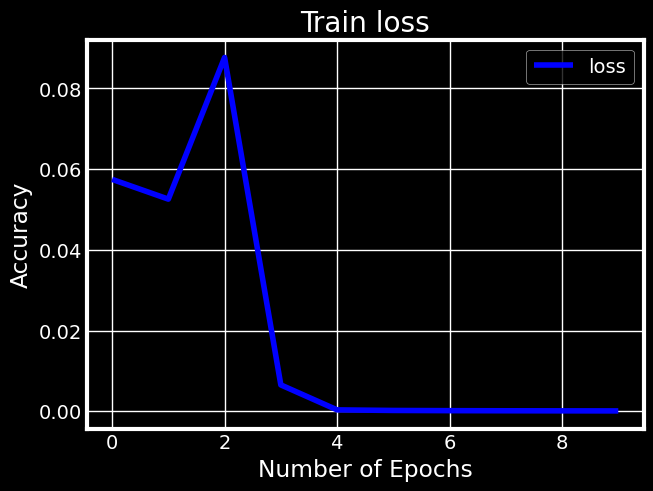

In [81]:
plt.style.use('dark_background')
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

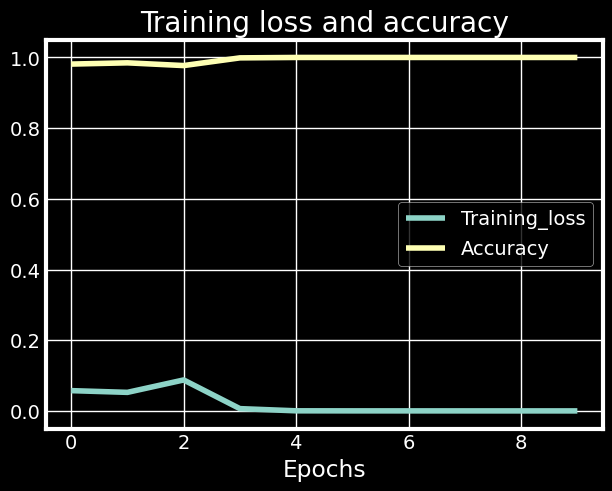

In [83]:
N=10 #epoch
plt.style.use('dark_background')
plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

In [18]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]

34/34 [==============================] - 0s 10ms/step


In [50]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

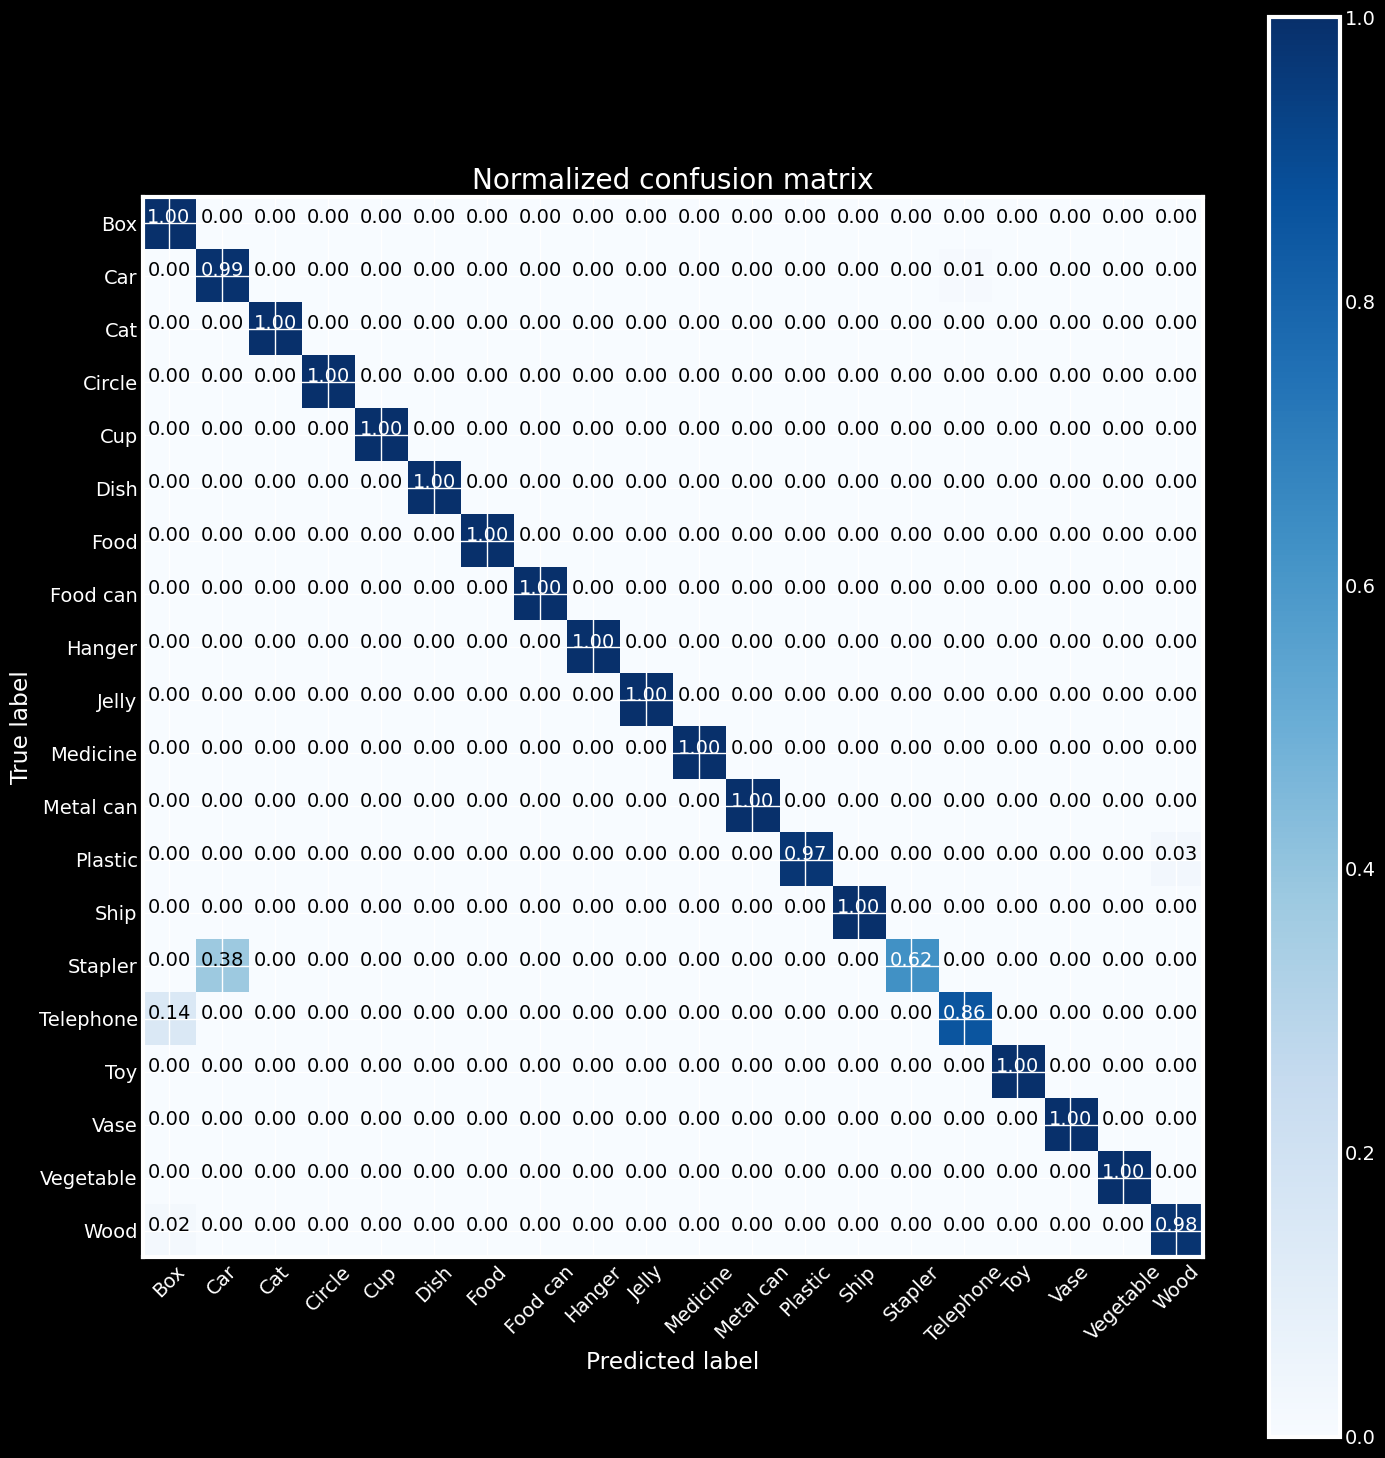

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES, title='Normalized confusion matrix')
plt.show()

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:" ,format(round(val_acc[-1]*100,2)))
print("loss =:        " ,format(round(loss[-1]*100,2)))
print("val_loss =:    " ,format(round(val_loss[-1]*100,2)))

accuracy =:     100.0
val_accuracy =: 99.25
loss =:         0.01
val_loss =:     5.59


In [90]:
model.save("new.model")

INFO:tensorflow:Assets written to: new.model\assets


INFO:tensorflow:Assets written to: new.model\assets


ROC AUC score: 0.9855830840166823


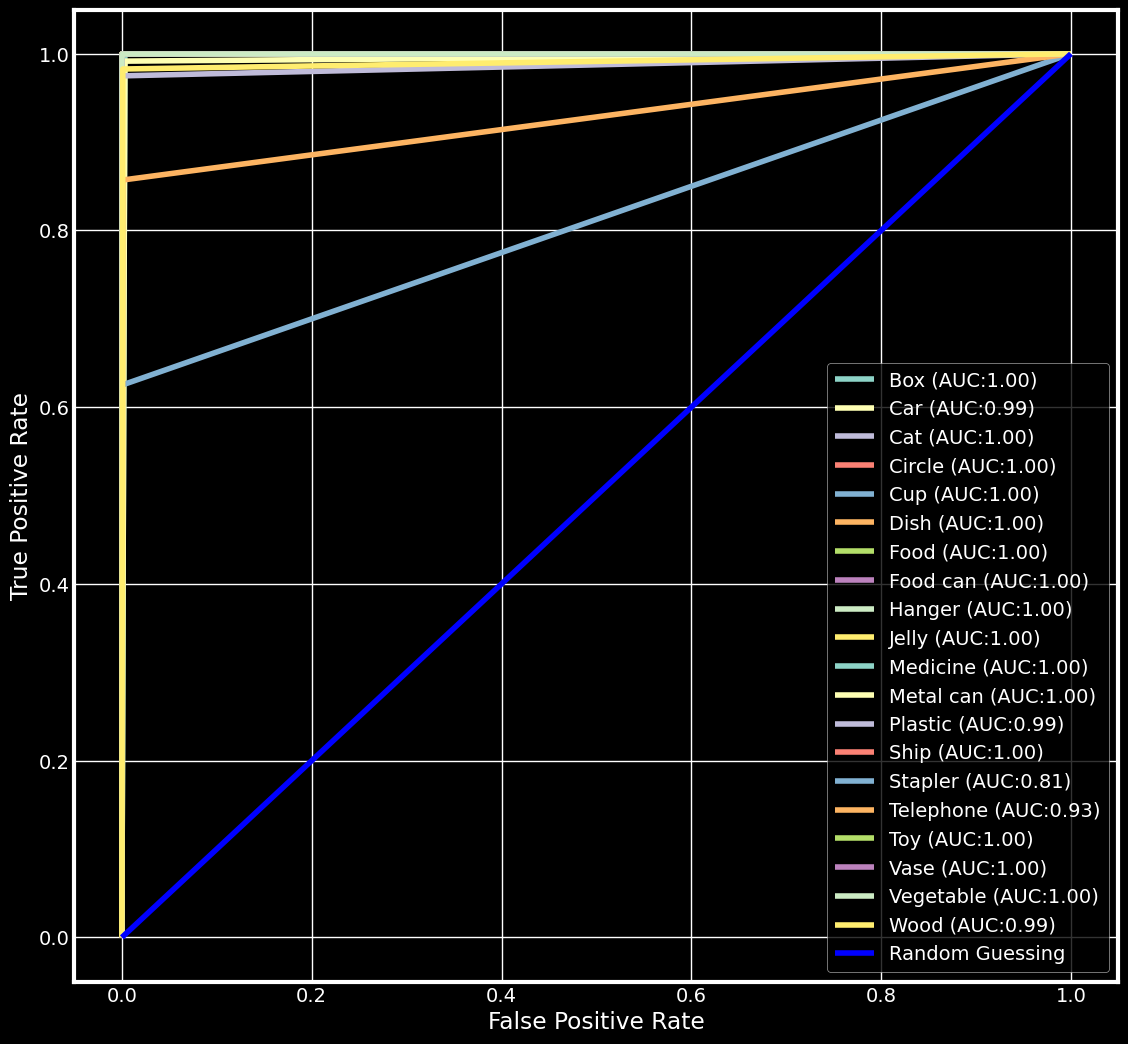

In [91]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


CATEGORIES = [ "Box", "Car", "Cat", "Circle", "Cup", "Dish", "Food", "Food can",
               "Hanger", "Jelly", "Medicine", "Metal can","Plastic", "Ship", 
               "Stapler", "Telephone","Toy", "Vase", "Vegetable","Wood" ]


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 12))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(CATEGORIES):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [92]:
# Predict random image
k = random.randint(0, (len(x_test)))

In [93]:
pred1 = model.predict(x_test[k].reshape(1, 100, 100, 1))
print(pred1.argmax())
print("This image is : ", CATEGORIES[pred1.argmax()])

1/1 [==============================] - 0s 118ms/step
9
This image is :  Jelly


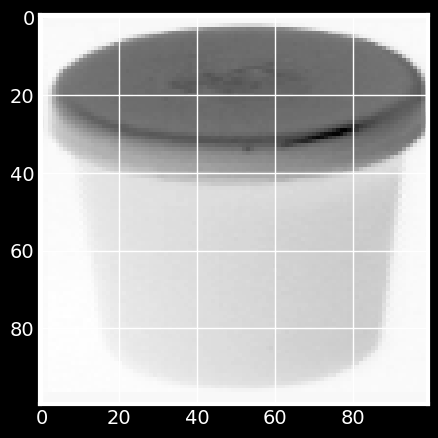

In [94]:
pic2 = x_test[k].reshape(100, 100)
plt.imshow(pic2, cmap = 'Greys')

In [138]:
# Predict outside image
def prepare(filepath):
    IMG_SIZ=128
    im=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(im,(IMG_SIZ,IMG_SIZ))
    return new_img

In [ ]:
prediction=model.predict(np.array([prepare("Dataset/Box/obj1__285.png")]))

In [47]:
if prediction[0][0]==1:
    print("this image for: Box")
if prediction[0][1]==1:
    print("this image for: Car")
if prediction[0][2]==1:
    print("this image for: Cat")
if prediction[0][3]==1:
    print("this image for: Circle")
if prediction[0][4]==1:
    print("this image for: Cup")
if prediction[0][5]==1:
    print("this image for: Dish")    
if prediction[0][6]==1:
    print("this image for: Food")
if prediction[0][7]==1:
    print("this image for: Food can")
if prediction[0][8]==1:
    print("this image for: Hanger")
if prediction[0][9]==1:
    print("this image for: Jelly")
if prediction[0][10]==1:
    print("this image for: Medicine")  
if prediction[0][11]==1:
    print("this image for: Metal can")    
if prediction[0][12]==1:
    print("this image for: Plastic")    
if prediction[0][13]==1:
    print("this image for: Ship")    
if prediction[0][14]==1:
    print("this image for: Stapler")
if prediction[0][15]==1:
    print("this image for: Telephone")
if prediction[0][16]==1:
    print("this image for: Toy")
if prediction[0][17]==1:
    print("this image for: Vase")
if prediction[0][18]==1:
    print("this image for: Vegetable")
if prediction[0][19]==1:
    print("this image for: Wood")

this image for: Box
